В данной работе будет рассмотрена поисковая система Algolia.


# История развития #
Стартап Algolia был основан в 2012 году во Франции Николя Дессеном и Жюльеном Лемуаном. Первоначально компания специализировалась на офлайн-поиске для мобильных телефонов, но позже переключилась на онлайн-ресурсы. 

В 2014 году стартап прошел в зимний набор акселератора Y Combinator.

В 2018 году компания Algolia приобрела SeaUrchin.IO, одну из первых платформ, которая специализируется на информированнии предприятий о поисковых запросах в режиме реального времени.

В 2021 году в состав Algolia вошел румынский стартап MorphL, который специализируется на прогнозировании поведения потребителей на ecommerce-площадках и использует модели на базе машинного обучения, чтобы предоставить наиболее точные рекомендации.   

В общей сложности стартап привлек $334,3 млн в ходе 9 раундов, последний из которых состоялся 28 июля 2021 года. В Algolia вкладывались Glynn Capital Management, World Innovation Lab, Twilio, Salesforce Ventures и другие.

Первые два дата-центра Algolia были запущены в Европе и США. В марте 2014 года открыт третий центр в Сингапуре, и сейчас у нее более 70 центров обработки данных в 16 регионах мира.

Офисы Algolia расположены во Франции (Париж), США (Сан-Франциско, Атланта, Нью-Йорк, Остин), Великобритании (Лондон) и Румынии (Бухарест).

# Инструменты для взаимодействия #

Для данной системы реализовано много клиентов на популярных языках программирования (PHP, Ruby, JavaScript, Python, Swift, Kotlin, .NET, Java, Go, Scala). Более подробно можно ознакомится со списком по ссылке ниже. 

https://www.algolia.com/doc/rest-api/search/

Так же же пользователю предлагается следующие методы для работы:

Algolia Search — API, состоящий из блоков, который можно настроить и запустить за несколько минут. Позволяет индексировать контент из любого источника, включает набор UI-компонентов для настройки желаемого опыта, инструменты для аналитики и A/B тестирования, визуальный редактор, опцию настройки собственного алгоритма релевантности и другие возможности.

Algolia Recommend — простой и надежный API, который помогает настроить рекомендации в соответствии с контекстом приложения клиента. Позволяет автоматически показывать пользователям и покупателям продукты и контекст, которые дополняют и улучшают текущую выборку. Решение увеличивает конверсию и помогает продемонстрировать ассортимент онлайн-продавца.


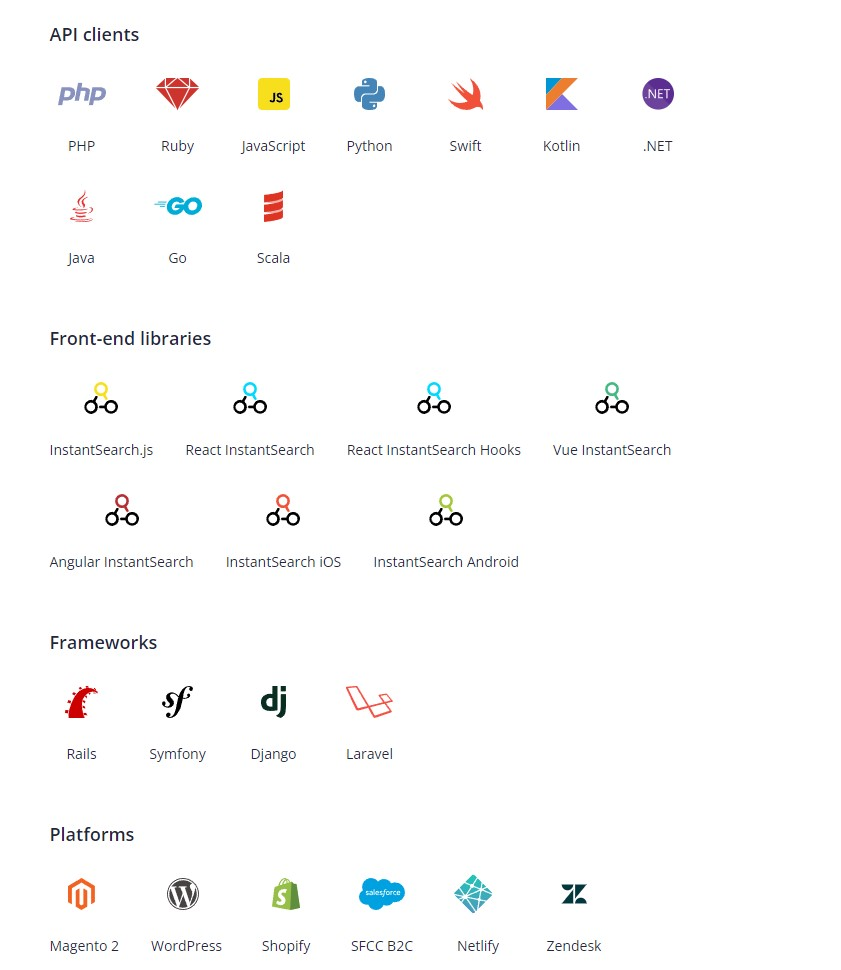

# Database engine #

Данная система основана на search engine.

Немного о нем:

Поисковые системы — это системы управления базами данных NoSQL , предназначенные для поиска содержания данных. В дополнение к общей оптимизации для этого типа приложений специализация обычно заключается в предоставлении следующих функций:

Поддержка сложных поисковых выражений
Полнотекстовый поиск
Стемминг (приведение флективных слов к их основе)
Ранжирование и группировка результатов поиска
Распределенный поиск для высокой масштабируемости

# Запросы #

В качестве клиента будем использовать Python.

Для установки пакетов нужно выполнить команду:

```pip install --upgrade 'algoliasearch>=2.0,<3.0'```


In [4]:
from algoliasearch.search_client import SearchClient

import json

Для работы с Algolia нужна регистрация, чтобы получить APP_ID и ADMIN_API_KEY

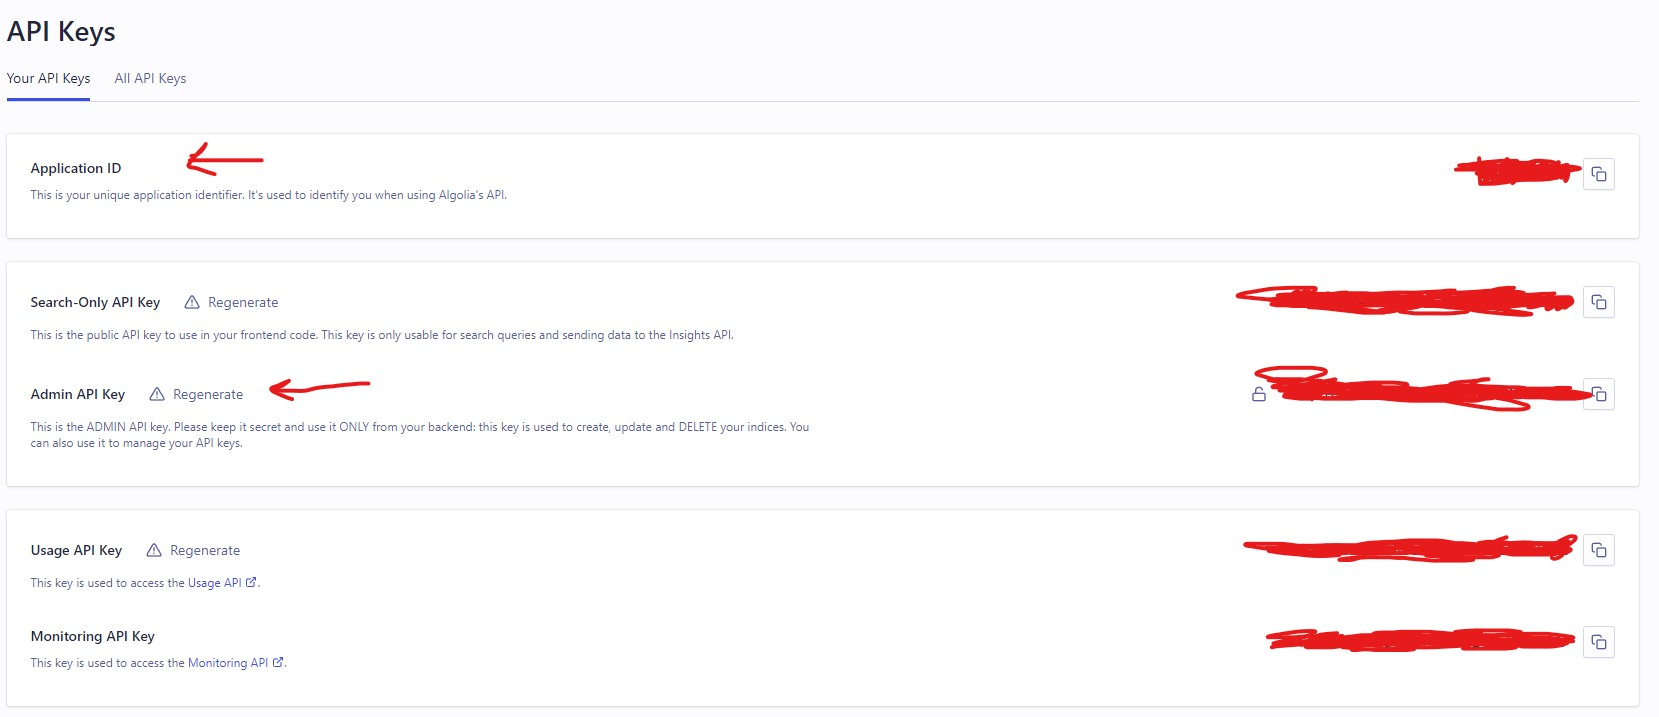

In [10]:
with open('admin_api_key.txt') as f:
     = f.read()
    
with open('app_id.txt') as f:
    APP_ID = f.read()

Инициализация клиента, создание индекса

In [11]:
client = SearchClient.create(APP_ID, ADMIN_API_KEY)
index = client.init_index('TestApp')

In [12]:
batch = json.load(open('contacts.json'))
index.save_objects(batch, {'autoGenerateObjectIDIfNotExist': True})

In [17]:
print(index.search('jimmie'))

{'hits': [{'firstname': 'Jimmie', 'lastname': 'Hardgrove', 'company': 'Prosthodontic Associates', 'address': '305 E 47th St', 'city': 'New York', 'county': 'New York', 'state': 'NY', 'zip': '10017', 'phone': '212-980-0445', 'fax': '212-980-6914', 'email': 'jimmie@hardgrove.com', 'web': 'http://www.jimmiehardgrove.com', 'followers': 1002, 'objectID': '58662002', '_highlightResult': {'firstname': {'value': '<em>Jimmie</em>', 'matchLevel': 'full', 'fullyHighlighted': True, 'matchedWords': ['jimmie']}, 'lastname': {'value': 'Hardgrove', 'matchLevel': 'none', 'matchedWords': []}, 'company': {'value': 'Prosthodontic Associates', 'matchLevel': 'none', 'matchedWords': []}, 'address': {'value': '305 E 47th St', 'matchLevel': 'none', 'matchedWords': []}, 'city': {'value': 'New York', 'matchLevel': 'none', 'matchedWords': []}, 'county': {'value': 'New York', 'matchLevel': 'none', 'matchedWords': []}, 'state': {'value': 'NY', 'matchLevel': 'none', 'matchedWords': []}, 'zip': {'value': '10017', 'ma

In [18]:
print(index.search('jimie'))

{'hits': [{'firstname': 'Jimmie', 'lastname': 'Hardgrove', 'company': 'Prosthodontic Associates', 'address': '305 E 47th St', 'city': 'New York', 'county': 'New York', 'state': 'NY', 'zip': '10017', 'phone': '212-980-0445', 'fax': '212-980-6914', 'email': 'jimmie@hardgrove.com', 'web': 'http://www.jimmiehardgrove.com', 'followers': 1002, 'objectID': '58662002', '_highlightResult': {'firstname': {'value': '<em>Jimmie</em>', 'matchLevel': 'full', 'fullyHighlighted': True, 'matchedWords': ['jimie']}, 'lastname': {'value': 'Hardgrove', 'matchLevel': 'none', 'matchedWords': []}, 'company': {'value': 'Prosthodontic Associates', 'matchLevel': 'none', 'matchedWords': []}, 'address': {'value': '305 E 47th St', 'matchLevel': 'none', 'matchedWords': []}, 'city': {'value': 'New York', 'matchLevel': 'none', 'matchedWords': []}, 'county': {'value': 'New York', 'matchLevel': 'none', 'matchedWords': []}, 'state': {'value': 'NY', 'matchLevel': 'none', 'matchedWords': []}, 'zip': {'value': '10017', 'mat

In [19]:
print(index.search('california paint'))

{'hits': [{'firstname': 'Jimmie', 'lastname': 'Barninger', 'company': 'California Paint & Wlpaper Str', 'address': 'Box #-4038', 'city': 'Modesto', 'county': 'Stanislaus', 'state': 'CA', 'zip': '95352', 'phone': '209-525-7568', 'fax': '209-525-4389', 'email': 'jimmie@barninger.com', 'web': 'http://www.jimmiebarninger.com', 'followers': 3947, 'objectID': '58637002', '_highlightResult': {'firstname': {'value': 'Jimmie', 'matchLevel': 'none', 'matchedWords': []}, 'lastname': {'value': 'Barninger', 'matchLevel': 'none', 'matchedWords': []}, 'company': {'value': '<em>California</em> <em>Paint</em> & Wlpaper Str', 'matchLevel': 'full', 'fullyHighlighted': False, 'matchedWords': ['california', 'paint']}, 'address': {'value': 'Box #-4038', 'matchLevel': 'none', 'matchedWords': []}, 'city': {'value': 'Modesto', 'matchLevel': 'none', 'matchedWords': []}, 'county': {'value': 'Stanislaus', 'matchLevel': 'none', 'matchedWords': []}, 'state': {'value': 'CA', 'matchLevel': 'none', 'matchedWords': []}

In [20]:
print(index.search('jimmie paint'))

{'hits': [{'firstname': 'Jimmie', 'lastname': 'Barninger', 'company': 'California Paint & Wlpaper Str', 'address': 'Box #-4038', 'city': 'Modesto', 'county': 'Stanislaus', 'state': 'CA', 'zip': '95352', 'phone': '209-525-7568', 'fax': '209-525-4389', 'email': 'jimmie@barninger.com', 'web': 'http://www.jimmiebarninger.com', 'followers': 3947, 'objectID': '58637002', '_highlightResult': {'firstname': {'value': '<em>Jimmie</em>', 'matchLevel': 'partial', 'fullyHighlighted': True, 'matchedWords': ['jimmie']}, 'lastname': {'value': 'Barninger', 'matchLevel': 'none', 'matchedWords': []}, 'company': {'value': 'California <em>Paint</em> & Wlpaper Str', 'matchLevel': 'partial', 'fullyHighlighted': False, 'matchedWords': ['paint']}, 'address': {'value': 'Box #-4038', 'matchLevel': 'none', 'matchedWords': []}, 'city': {'value': 'Modesto', 'matchLevel': 'none', 'matchedWords': []}, 'county': {'value': 'Stanislaus', 'matchLevel': 'none', 'matchedWords': []}, 'state': {'value': 'CA', 'matchLevel': '

Вид запросов максимально прост - просто пишем что хотим найти, поиск идет по всем полям


Однако, запросы можно писать и более в подробном виде, добавив опциональный поиск:

In [27]:
index.search('California ', {
      'optionalFilters': [
          'firstname:Jimmie<score=2>',
          'company:Paint '
      ]
})

{'hits': [{'firstname': 'Jimmie',
   'lastname': 'Barninger',
   'company': 'California Paint & Wlpaper Str',
   'address': 'Box #-4038',
   'city': 'Modesto',
   'county': 'Stanislaus',
   'state': 'CA',
   'zip': '95352',
   'phone': '209-525-7568',
   'fax': '209-525-4389',
   'email': 'jimmie@barninger.com',
   'web': 'http://www.jimmiebarninger.com',
   'followers': 3947,
   'objectID': '58637002',
   '_highlightResult': {'firstname': {'value': 'Jimmie',
     'matchLevel': 'none',
     'matchedWords': []},
    'lastname': {'value': 'Barninger',
     'matchLevel': 'none',
     'matchedWords': []},
    'company': {'value': '<em>California</em> Paint & Wlpaper Str',
     'matchLevel': 'full',
     'fullyHighlighted': False,
     'matchedWords': ['california']},
    'address': {'value': 'Box #-4038',
     'matchLevel': 'none',
     'matchedWords': []},
    'city': {'value': 'Modesto', 'matchLevel': 'none', 'matchedWords': []},
    'county': {'value': 'Stanislaus',
     'matchLevel': '

Заметим, что добавление объектов сразу отражается в нашем профиле.


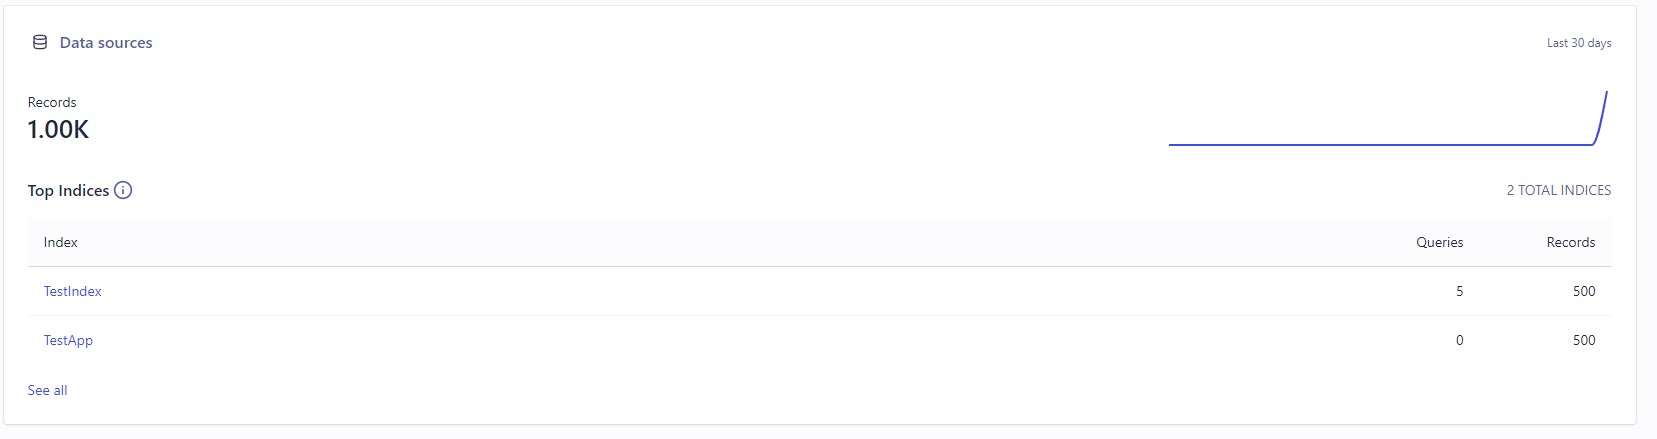

То есть наши данные хранятся удаленно.

Так же мы можем взаимодействовать с данными, напрямую через сайт.

Выполним запрос поиска.

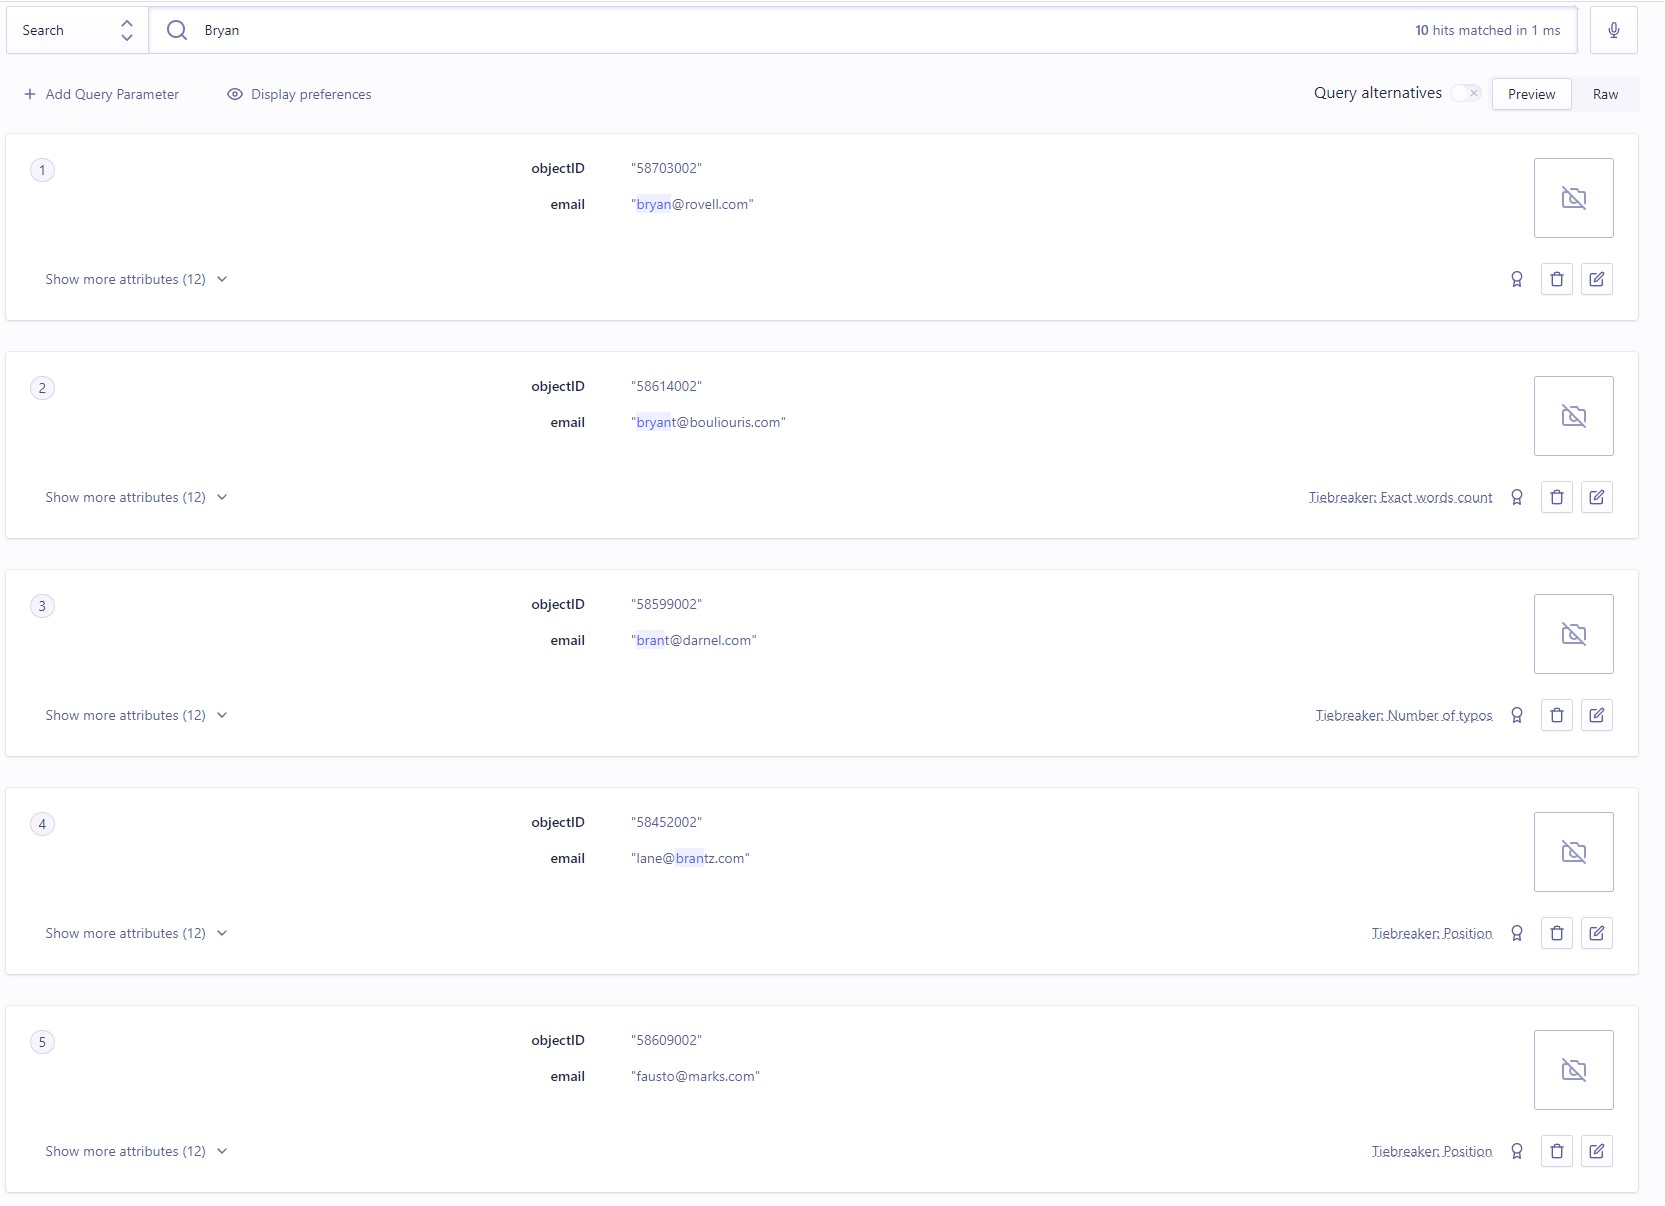

Как можно заметить, здесь необычный поиск, он ищет не только полные совпадения, но и похожие варианты, причем ищет их сразу среди всех полей.

Поиск можно проводить и по ID

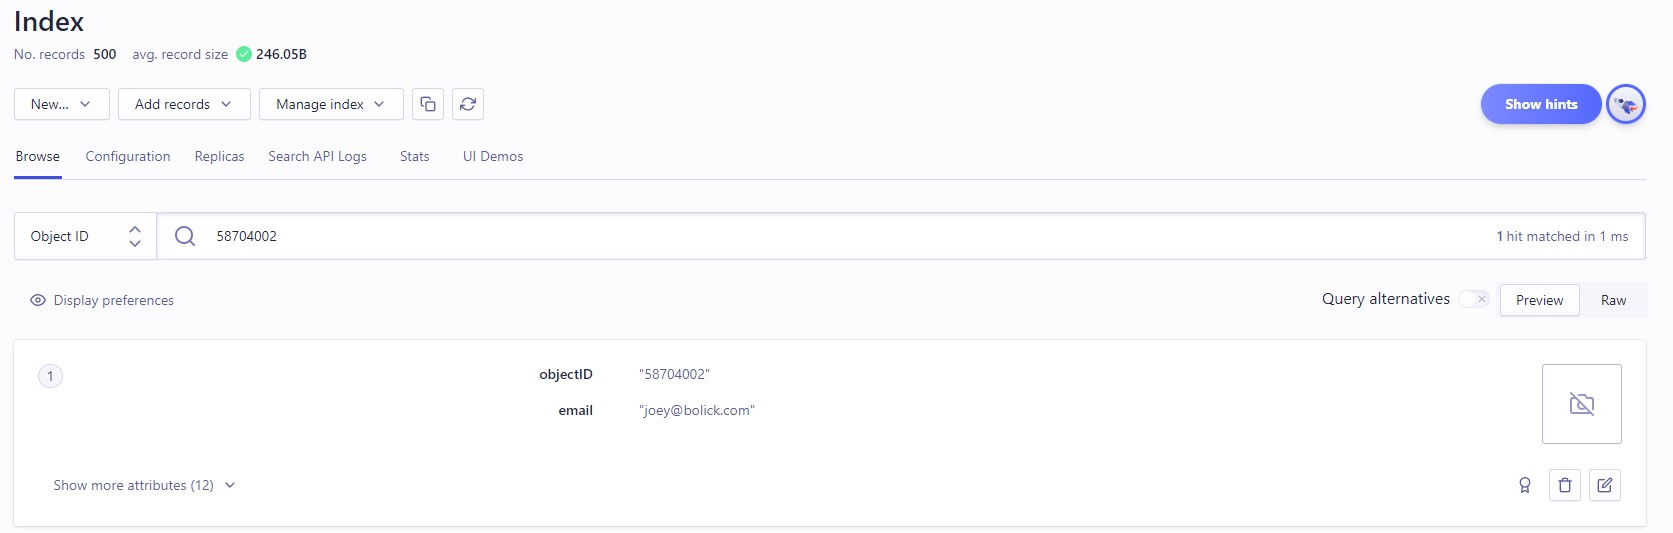

Поиск очень гибкий и можно менять различные параметры.

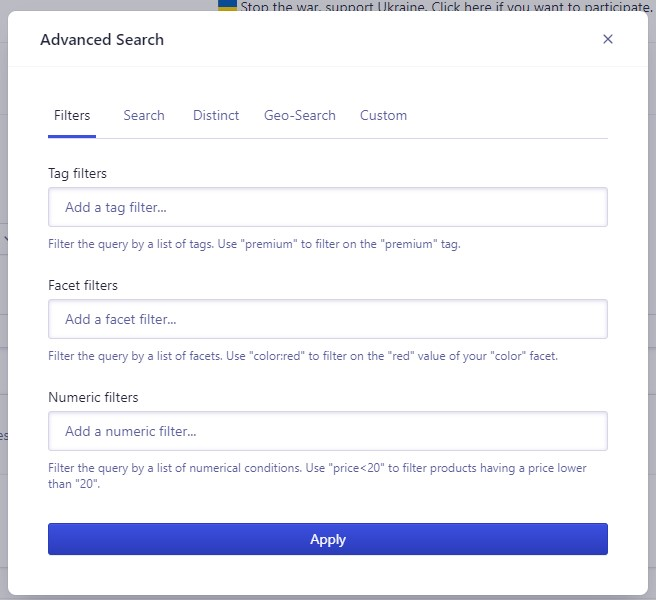

Так же на сайте предоставляется UI для поиска

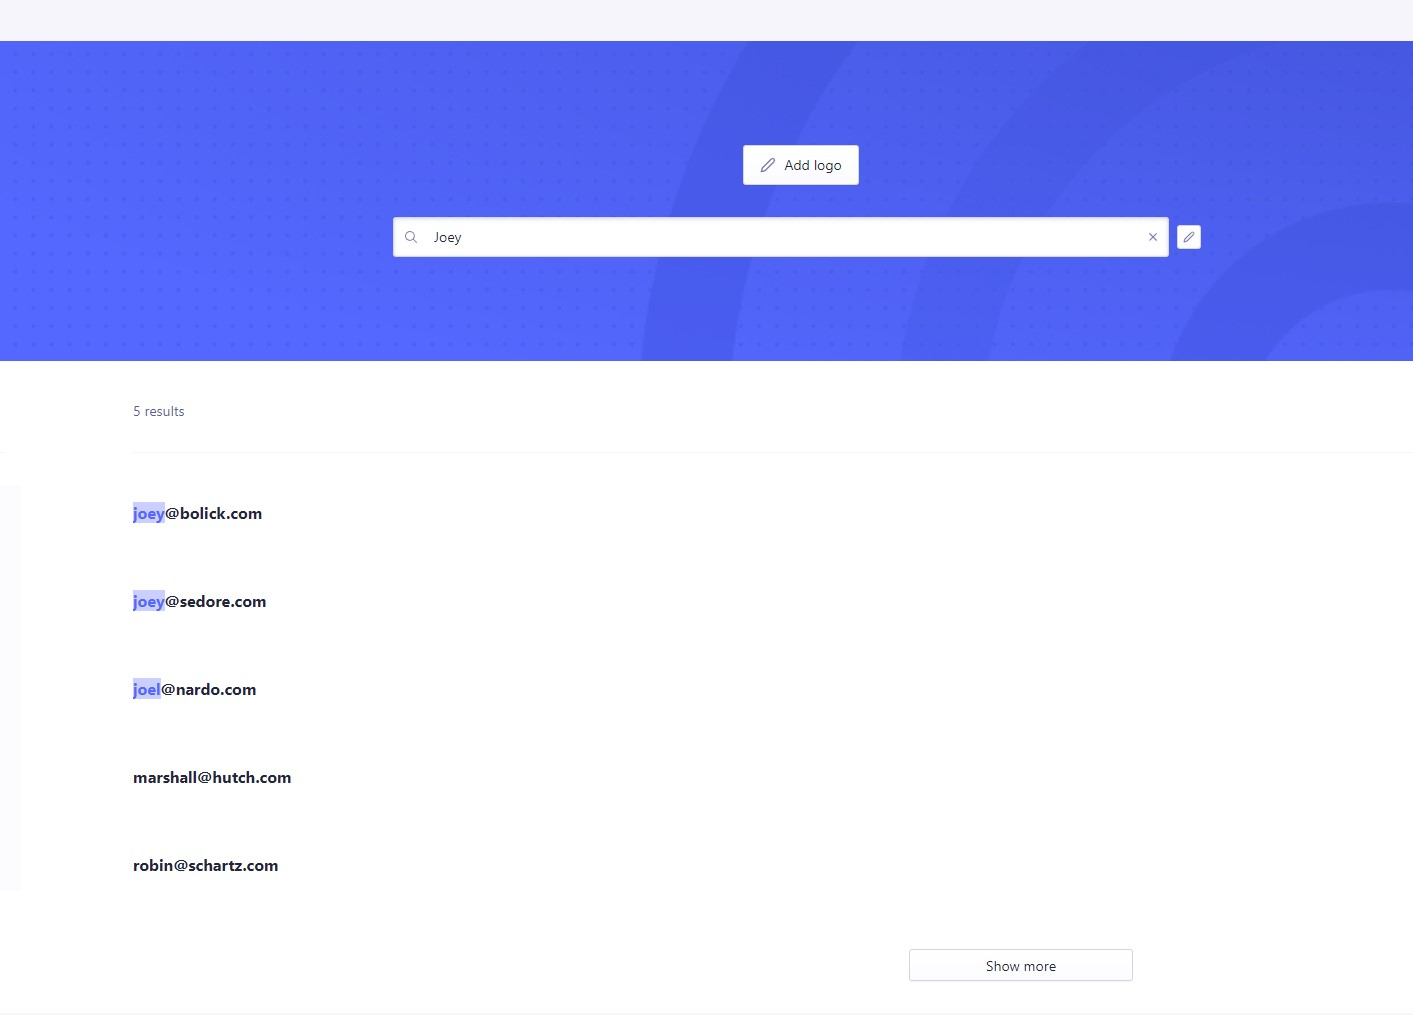

На самом деле данная система представляет широкий набор инструментов. Здесь широко используется AI для улучшения поиска.

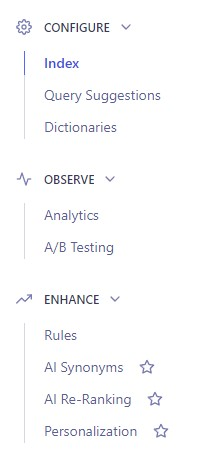

# Распределенные системы в бд #

### Инфраструктура ###

Кластеры
Algolia использует "трёхсерверную архитектуру", называемую кластером. Кластер Algolia - это набор из трех серверов, "сгруппированных" вместе для обработки всех запросов, который действует как один. Все серверы равны, то есть каждый из них одинаково способен отвечать на любой запрос. Чтобы это было возможно, каждый сервер должен иметь одинаковые параметры данных и индексов, а также одинаковую общую конфигурацию системы, что позволяет кластеру вести себя как единый сервер. Причиной возникновения кластеров является избыточность: если один или два сервера выходят из строя, служба все еще доступна.

Algolia имеет более 400 кластеров в 17 регионах и 70 центров обработки данных:

США-Восток (Вирджиния): два центра обработки данных Equinix в Эшберне и COPT DC-6 в Манассасе (три независимые автономные системы).
США-Запад (Калифорния): три центра обработки данных Equinix в Сан-Хосе (три независимые автономные системы).
США-Центр (Техас): два центра обработки данных в Далласе (две независимые автономные системы).
Европа (Франция): четыре центра обработки данных в Рубе, два различных центра обработки данных в Страсбурге и один центр обработки данных в Гравелине.
Европа (Нидерланды): четыре центра обработки данных вокруг Амстердама.
Европа (Германия): семь центров обработки данных в Фалькенштейне и один центр обработки данных во Франкфурте (две независимые автономные системы).
Европа (Великобритания): два центра обработки данных в Лондоне (две независимые автономные системы).
Канада: четыре центра обработки данных в Богарнуа.
Ближний Восток: один центр обработки данных в Дубае.
Сингапур: два дата-центра в Сингапуре (две независимые автономные системы).
Бразилия: три центра обработки данных вокруг Сан-Паулу (две независимые автономные системы).
Япония: один центр обработки данных в Токио и один центр обработки данных в Осаке.
Австралия: три центра обработки данных в Сиднее (две независимые автономные системы).
Индия: один центр обработки данных в Нойде.
Гонконг: два разных центра обработки данных (две независимые автономные системы).
Южная Африка: два центра обработки данных в Йоханнесбурге (две независимые автономные системы).

Так как Algolia предоставляет поиск, то все её клиенты используют одни и те же функции, что позволяет отказаться от виртуализации, а это увеличивает скорость работы. Многие крупные клиенты используют выделенные серверы и им предоставлен доступ ко всему кластеру. Большинство учетных записей имеют общие серверы, что означает, что они используют один и тот же движок Algolia. Однако в обеих ситуациях принцип работы один и тот же: Algolia работает непосредственно на машине. Используются высокочастотные процессоры, такие как Intel Xeon E5–1650v4 с частотой 3,9 ГГц, с 256 ГБ оперативной памяти.

Кластеры требуют надежного алгоритма для взаимосвязи, чтобы гарантировать, что каждый сервер содержит одни и те же данные в любое время, без прерывания обслуживания, используется алгоритм – RAFT, который координирует все входные данные (добавление, обновление и удаление индексных данных) так, чтобы все машины в кластере обновлялись одновременно. Когда серверы используют один и тот же центр обработки данных или одни и те же линии электропередач, однократное наводнение или отключение электроэнергии может привести к разрушению всего кластера. Таким образом, чтобы обеспечить надежность кластера, Algolia разделили серверы таким образом, чтобы ни один инцидент не мог привести к разрушению всего кластера. Algolia предоставляет инструмент для отслеживания своих серверов и кластеров с помощью панели мониторинга (в разделе Мониторинг -> состояние). При создании учетной записи можно выбрать, какой регион клиент хочет использовать. Кроме того, можно использовать функцию DSN для распространения поисковой системы в нескольких регионах и уменьшения задержки для аудитории в разных частях мира

### DSN ###
Распределенная поисковая сеть Algolia (DSN) добавляет один или несколько спутниковых серверов в кластер. Это расширяет охват кластера Algolia в других регионах, ближе к конечным пользователям. Возьмем, к примеру, клиента Algolia на восточном побережье США, его кластер находится рядом с Нью-Йорком. Однако не все конечные потребители находятся на восточном побережье: например, значительная часть клиентской базы может быть в Калифорнии. Имея только один кластер на восточном побережье, у калифорнийских пользователей будет более медленная работа поиска. По этой причине размещение сервера DSN на западном побережье может быть хорошей идеей, чтобы приблизить данные к пользователям западного побережья. Добавление серверов DSN в стратегических регионах снижает задержку в сети, повышает производительность и улучшает пользовательский интерфейс. DSN повышает вычислительную мощность Помимо приближения сервера к пользователям, DSN также расширяет вычислительную мощность кластеров. Они могут совместно использовать нагрузку: клиент может выгружать запросы в DSN всякий раз, когда его кластеры достигают пикового использования.

Сервер DSN - это мощная, полностью функционирующая, самодостаточная машина. Это репликация основного кластера. Каждый DSN работает независимо и содержит полные данные и настройки своего основного кластера. DSN получает задание для индексации только после того, как машины в кластере синхронизировались. Таким образом, DSN не сразу синхронизируются со своими кластерами: существует небольшая задержка (между секундами и минутами), зависящая от размера задания индексирования. Чтобы получить оценку этой задержки, необходимо учесть сетевую задержку между кластером и его DSN и добавить время, необходимое DSN для обработки задания индексирования. клиенты API реализуют стратегию повторных попыток, которая использует до четырех различных URL-адресов для каждого поискового запроса: один для DSN и три для кластера. Самый первый запрос всегда идет на ближайший сервер. Если эта первая попытка сработает, поиск будет продолжен. Если это не удается, клиенты активируют свою логику повторных попыток.

### MCM ###
Обычно все данные клиента могут поместиться в один кластер. Однако, когда их становится слишком много, управление несколькими кластерами (англ. Multi-Cluster Management) предлагает способ логически разбить данные так, чтобы: данные охватывали более одного кластера, и Algolia выполняла итоговый запрос только по одному кластеру.

MCM не позволяет выполнять поиск в разных кластерах, а также не объединяет результаты из разных кластеров. Распределение основано на разделении, при котором весь набор данных пользователя может быть помещен в один кластер, так что для выполнения полного поиска фактически требуется только один кластер. Другими словами, MCM не агрегирует результаты из разных кластеров. Это прекрасно работает для системы электронной почты, поскольку пользователи имеют эксклюзивный доступ к своим собственным данным.

Глобальные и частные данные. Управление личными данными осуществляется путем установки параметра UserID на определенный идентификатор пользователя.

Сопоставление пользователей с их кластером. Перед внедрением MCM каждому кластеру Algolia присваивается уникальный идентификатор приложения. Таким образом, если клиенты используют несколько кластеров, то им необходимо отслеживать, какой идентификатор приложения сопоставляется с каким кластером. Кроме того, они должны отслеживать, какой пользователь находится в каком кластере. Поэтому для управления несколькими кластерами они должны хранить таблицу сопоставления из 3 элементов - user, cluster и application id. Каждая операция индексирования и поиска должна проходить через это сопоставление. В случае MCM, кластеры в конфигурации с несколькими кластерами используют один и тот же идентификатор приложения. Клиенту нужно только отправить Algolia идентификатор пользователя, а затем Algolia сделает необходимое перенаправление, чтобы найти правильный кластер.

Перемещение данных и масштабируемость. Перемещение данных из одного кластера в другой требуется для балансировки нагрузки или добавления новых кластеров. MCM легко масштабируется, потому что каждый кластер независим c точки зрения данных: все данные разбиты на столько кластеров, сколько нужно, и каждый поиск выполняется в своем собственном кластере.

MultiClusters API скрывает трудности, связанные с несколькими кластерами, добавляя простой в использовании слой поверх классического API. Чтобы работать с API, нужно убедиться, что каждая запись помечена идентификатором пользователя. Как только эта маркировка завершена, API берет на себя управление сопоставлением пользователя с кластером, перенаправляя каждое обновление и запрос в соответствующий кластер.

# Язык программирования #

Algolia основана на поисковой системе, созданной с нуля, реализованной на C++ и размещенной на сервере NGINX в виде модуля NGINX. Первоначально был разработан движок Algolia для мобильных устройств как автономный встраиваемый SDK, прежде чем преобразовать его в онлайн-API. Создание Algolia для мобильных устройств вынудило серьезно оптимизировать производительность, учитывая ограниченное количество вычислительных ресурсов, которые были у смартфонов в то время. Теперь, когда та же технология работает на высокопроизводительных кластерах, она стала еще быстрее.

# Индексы #

Индекс является источником данных для поиска. Индекс - это набор записей. Это немного непривычно, но данное решение можно понять, так как наша бд это search engine. На одну таблицу создается один индекс, который можно гибко настроить под свои нужды.

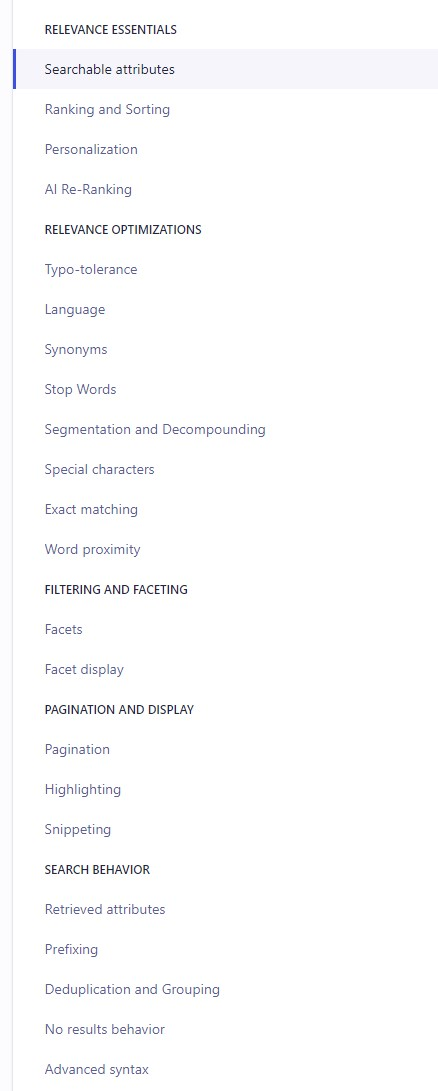

Настройка индекса

Создать индекс можно прямо в веб-клиенте.

(или командой ```client.init_index('IndexName')``` )

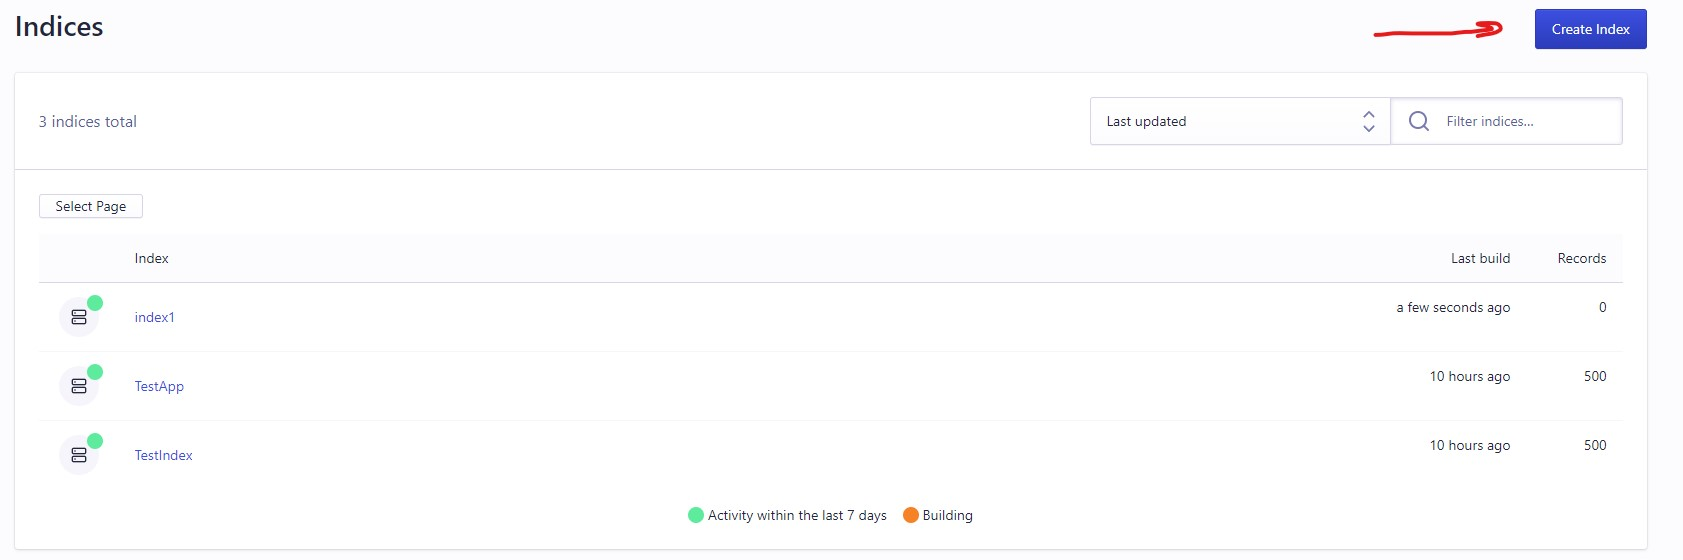

# Выполнение запросов #

Для элемента подсчитывается метрика, того насколько данный объект подходит к нашему запросу. После этого результаты ранжируются и выдаются пользователю. Тут так же имеется гибкая настройка поиска(смотреть выше).

Немного слов об этом с официального сайта Algolia.

#### Поиск результатов ###
Поиск результатов состоит из определения атрибутов и текстовых сравнений, которые влияют на выбор движком возвращаемых объектов. К ним относятся опечатки, префиксы, множественное число, стоп-слова и другие текстовые критерии , которые Algolia использует для повышения релевантности. Есть также некоторые нетекстовые критерии, такие как фильтрация и геолокация.

#### Рекорды рейтинга ####
Ранжирование имеет решающее значение, поскольку пользователи должны сначала увидеть результаты, наиболее точно соответствующие их запросам : это полностью зависит от порядка, в котором представлены записи. В рейтинге Algolia используется алгоритм устранения ничьих, в котором определенные критерии упорядочиваются и «сегментные» результаты вместе и разрываются между равными совпадениями.

(более подробно про выполнение запросов - ниже)

https://www.algolia.com/doc/guides/managing-results/must-do/custom-ranking/

# План запросов #

Архитектура Algolia не подразумевает наличие плана запросов.

# Транзакции #

Как было бы логично предположить, транзакций в Algolia тоже нет. Но в Algolia имеется пакетная отправка данных.

#### Отправка записей пакетами ####
Algolia позволяет отправлять одну или несколько записей в одном вызове API или пакетных записях. Вы можете группировать операции индексирования через API или панель инструментов.

Для оптимальной производительности индексирования следует отправлять записи пакетами . Идеальный размер пакета составляет ~10 МБ, что соответствует от 1000 до 10 000 записей в зависимости от среднего размера записи.

Пакетная обработка имеет несколько преимуществ: она сокращает количество сетевых вызовов и ускоряет индексирование . Пользователи с большим количеством записей видят наиболее значительное влияние на производительность, но каждый пользователь Algolia должен по возможности выполнять пакетное индексирование.

(более подробно об отправке данных - ниже)

https://www.algolia.com/doc/guides/sending-and-managing-data/send-and-update-your-data/

# Методы восстановления #

Так как данные хранятся на серверах Algolia, эту часть они берут на себя(только для определенных клиентов). 

Algolia сохраняеn временные резервные копии для оперативных целей; однако восстанавливаюся обновленные и удаленные индексы только для планов с надстройкой Enterpise, поэтому обязательно нужно сохранять собственные резервные копии.

# Шардирование #

Algolia обрабатывает все необходимые сегменты за кулисами, они невидимы для пользователя. Шарды можно динамически перебалансировать, чтобы избежать горячих точек. Для клиентов с особыми планами возможны специальные условия.

# Data Mining, Data Warehousing и OLAP #

### Data Mining ###

Algolia позволяет проводить разносторонний анализ данных. Одним из таких инструментов является аддон Algolia Crawler(к сожалению является платным). 

#### Что может анализ данных? ####
Анализ данных может обнаруживать следующие виды проблем:

Отсутствующие атрибуты


Пустые массивы


Атрибуты разных типов в записях


Массивы с элементами разных типов даже в пределах одной записи


Подозрительные объекты, которые могут быть другого типа, например, строка, которая использовалась в качестве объекта.


Анализ данных создает отчет с обзором того, сколько записей затронуто структурными проблемами. Он предоставляет подробную информацию о каждом несогласованном атрибуте записи и список страниц, на которых были обнаружены несоответствия.

(более подробно об анализе данных в Algolia - ниже)


https://www.algolia.com/doc/tools/crawler/insights-tools/data-analysis/


### Data Warehousing и OLAP ###

Algolia не предназначена для таких задач. На практике обычно используют какое-либо основное хранилище данных, а к нему уже подключают Algolia для поиска и анализа.

# Методы защиты #

Как мы уже могли понять - в Algolia все работает "из коробки". С безопасностью так же. Так как компания хранит данные на своих серверах на безопасность делается большой упор.

### Меры безопасности ###


#### Данные #### 


Высокодоступная архитектура с несколькими центрами обработки данных


Ключи API, предназначенные для браузера, а также для внутреннего использования


Безопасная многопользовательская архитектура, предотвращающая утечку данных между нашими клиентами


Мониторинг API для доступа к прозрачному состоянию вашего сервиса


Доступен логин SAML 2.0 для интеграции с вашим IdP


Шифрование в состоянии покоя доступно для дополнительной защиты


Регулярно обновляемые рекомендации по безопасности Algolia


####  Конфиденциальность #### 


Без встроенного отслеживания ваших пользователей, без файлов cookie, без отпечатков пальцев


Ключи API, предназначенные для браузера, а также для внутреннего использования


Сертифицированная конфиденциальность TRUSTe


Прозрачная политика конфиденциальности


Все наши услуги соответствуют GDPR


Все наши услуги соответствуют требованиям CCPA


Использование прозрачных файлов cookie


Стандартные договорные положения


####  Сообщество #### 


Ежегодный аудит SOC 2


HIPAA-совместимая среда


Все сотрудники обучены безопасности во время адаптации и ежегодно обновляются


Общедоступный CAIQ Альянса облачной безопасности


Полугодовое независимое тестирование наших сервисов на проникновение


(более подробно о мерах безопасности- ниже)


https://www.algolia.com/doc/guides/security/security-best-practices/

# Сообщество #

Данный проект является коммерческим, и разработку, непосредственно самой Algolia ведется компанией(насчитывает 600+ сотрудников в штате).

Но несмотря на этой у Algolia есть развитое сообщество, которое распространяет Open-Source решения, такие как API, библиотеки, фреймворки и плагины для работы с данной системой. Всего сейчас в данном проекте около 500 репозиториев.

https://github.com/algolia

Предлагать правки к этим Open-Source решениям может предлагать каждый, ревью и непосредственно изменения вносит ограниченное колиечество сотрудников Algolia (39 человек).

# Данные для тестов #

В качестве данных для тестов используются данные сотрудников с личной информацией(данные, естественно не настоящих людей).

Файл будет приложен к ноутбуку ( ```contacts.json``` ).

# Демобаза #

Algolia имеет много примеров работы с API, сайтом и демобазу. Примеры кода для работы с API Python можно найти по ссылке ниже (в работе были использованы некоторые из них).

https://www.algolia.com/doc/api-client/getting-started/what-is-the-api-client/python/?client=python

# Документация и гайды #

Так как Algolia предполагает в качестве клиентов не только программистов, но и людей с бизнеса, документация и гайды написана подробно и понятным языком.

https://www.algolia.com/doc/

Документацию к API можно найти ниже

https://www.algolia.com/doc/rest-api/search/

# Новости #

Чтобы быть в курсе обновлений следите за Algolia на официальном сайте и в социальных сетях

https://www.algolia.com/about/news/

https://twitter.com/algolia

https://www.linkedin.com/company/algolia/

https://www.facebook.com/algolia

https://www.youtube.com/user/Algolia

https://www.instagram.com/algolialife/

# Заключение #

Algolia - мощное решение задачи поиска среди данных. Имеет наибольшую актуальность для бизнеса, корпораций. Имеет удобное API, множество готовых решений. Имеет готовую, гибко настраиваемую рекомендательную систему, много аналитических решений(например AB-testing). Основной минус - цена. Можно найти более бюджетное решение, если не нужен такой обширный функционал (ElasticSearch). Так же к минусам можно отнести не такое широкое распространение, как ElasticSearch, результатом чего является меньшее количество уроков и информации, а так же специалистов. Однако, если вы можете позволить для своего бизнеса обслуживание такой системы, то это скорее всего будет лучшим вариантом для вам.